In [1]:
# code to plot data in 2D and do some calculations

In [15]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from stl import mesh as msh
from mpl_toolkits import mplot3d

import scipy.stats as st

In [16]:
# define helper functions
def get_position(p, N1, N2):
    return p / (max_p - min_p) * (N2 - N1) + N1

def load_data(data_name,min_x, max_x, min_y, max_y):
    df = pd.read_excel(data_name)
    # remove unnecessary columns
    for col in df.columns:
        if col in col_keeps:
            df.rename(columns = {col:col_keeps[col]}, inplace = True)
        else:
            df.drop(col, axis=1, inplace=True)
    df['y'] = get_position(df['%y'], min_y, max_y)
    df['x'] = get_position(df['%x'], min_x, max_x)
    df['-%y'] = 100 - df['%y']
    return df

In [17]:
col_keeps = {'%x (distance from pylorus side)':'%x', '%y (distance from bottom)':'%y'}

## setup maximimum x and y width
min_x, max_x = 0, 36.7
min_y, max_y = 24.6, 0
min_p, max_p = 0, 100

In [18]:
df_igle = load_data('res/IGLE_data.xlsx',min_x, max_x, min_y, max_y)
df_ima = load_data('res/IMA_analyzed_data.xlsx',min_x, max_x, min_y, max_y)
df_efferent = load_data('res/Efferent_data.xlsx',min_x, max_x, min_y, max_y)

In [43]:
data_array = df_efferent
data_array = data_array[~data_array.isin([np.nan]).any(1)]

In [44]:
# Extract x and y
x = np.array(data_array['x'])
y = np.array(data_array['y'])

# Create meshgrid
xx, yy = np.mgrid[min_x:max_x:100j, min_y:max_y:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape

sampled_pts = kernel.resample(1000).T

Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

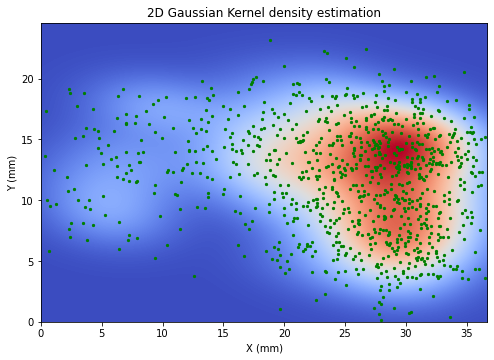

In [59]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

ax.set_xlim(min_x, max_x)
ax.set_ylim(max_y, min_y)

cfset = ax.contourf(xx, yy, f, levels=1000,cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[min_x, max_x, min_y, max_y])

ax.scatter(sampled_pts[:, 0], sampled_pts[:, 1], s=5, color='g')

ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
plt.title('Gaussian Kernel density estimation')

In [52]:
# blurb here about how hte resampled points can be used for simulation

In [53]:
print(sampled_pts[:,1])



[15.86424665 17.27881594  6.11484177 10.08782861  8.32098122 17.14030222
 12.33694926 15.34107091 13.33965466 11.90276166  8.3244513   2.89654546
 10.94385257  5.85938976 14.00730046  9.09543573 18.91451557  8.11938268
 11.87255351 12.65538135 11.6869955  13.53766123 16.22566757 12.75695165
 16.68938799  5.22441125  3.80536055  6.22896819  4.03108111 19.39690346
 12.53960715 16.09688057 12.81479276  3.75091259 10.77926785 18.85093682
 17.33572208  8.56523862 12.12208479  8.71232523 13.36188904  4.63815594
  7.3876437  19.9869081  10.7432277  14.67471061 10.00069764 18.39774127
 10.0175357  10.37200281 12.09430078  6.58080187  9.85075755  7.94525153
 14.48379303 10.69565983  6.37529265 12.17121529 12.67696459 12.86814633
  1.02477425 16.8593513  14.93638352 13.80815294 14.54165704 17.15080356
 14.61208787  7.64810436  8.98210412 13.63190434  3.63378982  5.14810372
 15.87069175 13.38305453 12.12727489 13.55994844 11.11600434 15.39728652
 15.08582643  3.1654164  13.41477313 14.57222305  8